In [1]:
from load_data import load
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization
from tensorflow.keras import regularizers

In [3]:
(train_data, train_labels, test_data, test_labels) = load()

In [ ]:
train_data.shape

In [ ]:
plt.imshow(train_data[7])

In [46]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, padding='same', input_shape=(32,32,3)))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Conv2D(256, kernel_size=5, padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=5, padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 16, 16, 128)       204928    
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 128)      

In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
sm_cb = tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath='../models/deep_net_weights.hdf5', verbose=1, save_best_only=True)
history = model.fit(train_data, train_labels, epochs=30, verbose=2, validation_split=0.2, shuffle=True, callbacks=[es_cb, sm_cb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: val_loss improved from inf to 1.72416, saving model to ../models/deep_net_weights.hdf5
40000/40000 - 33s - loss: 1.8147 - accuracy: 0.3224 - val_loss: 1.7242 - val_accuracy: 0.3881
Epoch 2/30

Epoch 00002: val_loss improved from 1.72416 to 1.28361, saving model to ../models/deep_net_weights.hdf5
40000/40000 - 32s - loss: 1.2461 - accuracy: 0.5477 - val_loss: 1.2836 - val_accuracy: 0.5596
Epoch 3/30

Epoch 00003: val_loss improved from 1.28361 to 1.04866, saving model to ../models/deep_net_weights.hdf5
40000/40000 - 33s - loss: 0.9662 - accuracy: 0.6583 - val_loss: 1.0487 - val_accuracy: 0.6314
Epoch 4/30

Epoch 00004: val_loss improved from 1.04866 to 0.88798, saving model to ../models/deep_net_weights.hdf5
40000/40000 - 32s - loss: 0.7965 - accuracy: 0.7234 - val_loss: 0.8880 - val_accuracy: 0.6916
Epoch 5/30

Epoch 00005: val_loss improved from 0.88798 to 0.77983, saving model to ../models/deep_net_weights.hdf

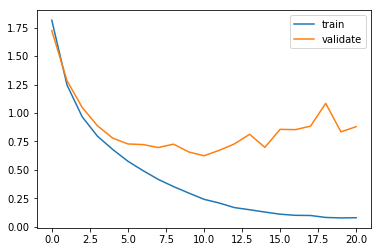

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validate'], loc='upper right')

In [51]:
test_labels = np.array(test_labels, dtype='uint8')
model.load_weights('../models/deep_net_weights.hdf5')
model.evaluate(test_data, test_labels, verbose=0)

[0.6444815087318421, 0.8085]

In [21]:
from tensorflow.keras.models import load_model
model = load_model('../models/best_deep.hdf5')
model.evaluate(test_data, test_labels, verbose=0)

[0.7034426215648651, 0.7723]